Dataset Used: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
#Importing Libraries
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/path/to/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
#Loading Pretrained CNN Model
cnn = tf.keras.models.load_model("/path/to/trained_plant_disease_model.keras")

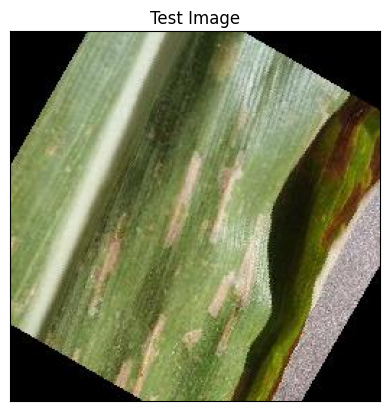

In [ ]:
#Test Image Visualization
import cv2
image_path = '/path/to/image_for_testing.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 7s 7s/step


In [6]:
print(predictions)

[[1.5010114e-06 4.4114262e-14 3.2791336e-09 8.7566379e-17 1.9731978e-14
  2.8312544e-15 1.0006261e-18 9.9997127e-01 2.7145961e-05 9.1904891e-13
  2.3047269e-16 5.1513176e-17 1.1014033e-17 1.3981817e-15 8.7951412e-16
  8.5704858e-16 8.1055015e-14 1.4112263e-12 1.3185945e-13 1.9521522e-10
  7.3737267e-14 1.8883507e-19 2.0206845e-14 1.9321235e-17 1.5883191e-20
  7.9222314e-16 2.5478399e-14 2.8474769e-17 1.2001635e-17 8.1682597e-15
  1.7431877e-15 1.5545656e-19 1.4600242e-17 1.8256690e-21 7.1159233e-16
  1.3919038e-20 1.4037744e-19 4.1424739e-15]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

7


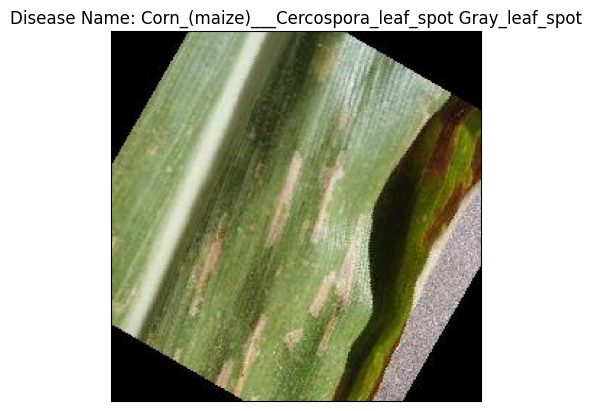

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, dataset):
    # Get true labels and predictions
    y_true = []
    y_pred = []

    for images, labels in dataset:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    # Print results
    print("Accuracy:", accuracy)
    print("Precision (weighted):", precision)
    print("Recall (weighted):", recall)
    print("F1 Score (weighted):", f1)
    print("\nClassification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "classification_report": report,
        "confusion_matrix": cm
    }

# Usage
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')
metrics = evaluate_model(cnn, validation_set)


1/1 [==============================] - 1s 508ms/step
Accuracy: 0.9594809924880492
Precision (weighted): 0.9616271832481114
Recall (weighted): 0.9594809924880492
F1 Score (weighted): 0.9591011471517139

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       504
           1       0.99      0.98      0.99       497
           2       0.96      1.00      0.98       440
           3       0.94      0.96      0.95       502
           4       0.97      0.97      0.97       454
           5       1.00      0.95      0.97       421
           6       0.96      0.99      0.97       456
           7       0.95      0.94      0.94       410
           8       1.00      1.00      1.00       477
           9       0.94      0.96      0.95       477
          10       0.99      1.00      0.99       465
          11       0.98      0.98      0.98       472
          12       0.98      0.99      0.98       480
          13     